<a href="https://colab.research.google.com/github/tomferg/Python_Data_Visualization/blob/main/Data_Visualization_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overall Summary

This Python Notebook contains an attempt at simulating data and visualizing that data in a variety of ways.

Coded by: Tom Ferguson, PhD, University of Alberta

Last Update: July 16, 2025

# Set-up - Explanation and Package Loading

Note: This document is a work-in-progress and (hopefully) changes fairly often.


## Description of the Notebook
In this python notebook, I've basically put together code I've generated (with generous help from random folks across the internet of course!) for the creation of figures. I essentially just wanted to put together a resource for plotting figures where all my code was centrally located. This resource generally assumes some familarity with Python, although I've tried to be as descriptive as possible.

Much of the time, these figures are inspired by the data I've collected during my research career. However, in the interest of keeping things fresh (and so I/we can understand how Python plots work better), this worksheet will include use data that we'll make ourselves.

The general set-up of each section is:
1. Ask a question that we might want to answer with that plot
2. Generate simulated data for
3. Plot that data in the simplest way
4. Progressively add more elements to the plot

Note: I won't actually be providing a formal intepretation of the data but it should be simple enough to interpret.



## Packages Needed

Before we jump into the actual data simulation and figure generation, we need to load a series of packages.

A brief explanation of each:
1. Numpy = popular package for working on arrays and matrices
2. Matplotlib = popular package for data visualization
3. Pandas = popular package for working with data frames - Seaborn interfaces well with it.
4. Seaborn = an additional data visualization package that wraps around matplotlib
5. Random = package that lets us set a seed so figures are reproducible
6. Scipy.Stats = a package we'll use for various statistical calculations (like 95% confidence intervals)
7. Plotly = a somewhat more advanced plotting package that makes more interactive figures

In [1]:
# Load Packages
# Google Colab should have all these packages ready for use
# But you can use: % pip install (package name)  - the % should only install in the current kernal
# alternatively you can use ! pip install to install the package

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from scipy import stats

# Plotly packages
import plotly.express as px
import plotly.graph_objects as go
from plotly.colors import n_colors

# Set seed so it is reproducible
random.seed(150)

# Figure 1 - Barplot & Stripplot


This will be the plot that builds from most basic to complete. After generating a number of different forms of this plot, we'll use the skeleton of the work here on all the future figures.

The first thing we'll do is ask some question and simulate some data for that question



## Question we want to ask

**How much profit does a product (later, a series of products) generate?**

## Data Simulation Set-up
The first thing we'll do is simulate some data. We're going to primarily stick with Pandas to create dataframes for use with Seaborn (as I find seaborns plots have a bit more pizzazz than Matplotlib).

For this example dataset, we'll set it up as being average profits for some type of product. We will make our data-set more complex as we add more information to it. First, we'll start with a single product.

Note: keeping our data in long format works best for plotting (so each row is an observation/time point per subject).

In [2]:
# Generate empty dataframe
prodDF = pd.DataFrame()

# Use numpy to generate an array of "average profits" from a Gaussian distribution
# Mean = 100$, Standard Deviation = 10$, Number of observations = 10
numObs = 10 # We'll save this as we'll need it later
prodProfits = np.random.normal(loc=100, scale=10, size=numObs)

# Add profits to dataframe
prodDF['Profits'] = prodProfits

# add the product type - we'll call this product "Prod A"
prodDF['Type'] = "Product A"

# Print out the first few rows to make sure all looks good
prodDF.head()

Profits       Type
0  100.033520  Product A
1   98.883123  Product A
2  108.016931  Product A
3   90.232323  Product A
4  107.685950  Product A

## Plotting Data using a Barplot

First we'll start with just a simple bar chart with no errorbar

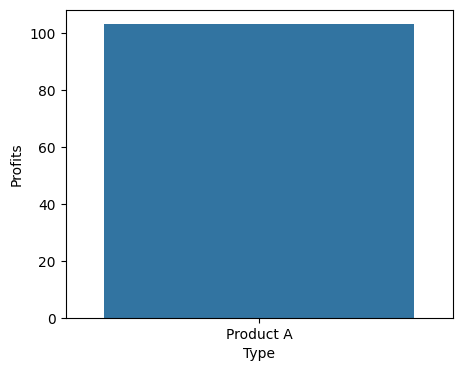

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.barplot(data=prodDF, x = 'Type', y='Profits', errorbar=None)
plt.show()

Next, let's formally specify our x and y axis titles

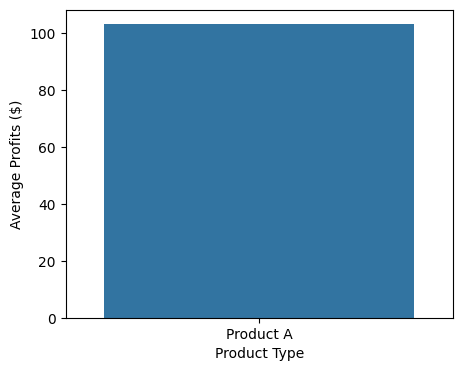

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.barplot(data=prodDF, x = 'Type', y='Profits', errorbar=None)
plt.xlabel('Product Type')
plt.ylabel('Average Profits ($)')
plt.show()

Let's now change the color of the plot and fix our y axis up a bit. We'll just use one of the qualitative palettes called "Set 2"

See seaborn color palettes for our options: [Color Link](https://seaborn.pydata.org/tutorial/color_palettes.html)




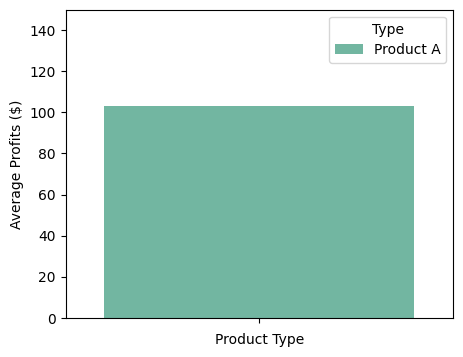

In [5]:
# Here is the palette to specify
newColor = sns.color_palette("Set2")

# Run Figure
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.barplot(data=prodDF, hue = 'Type', y='Profits', errorbar=None, palette = newColor[0:1]) # We assign the colors to "palette"
plt.xlabel('Product Type')
plt.ylabel('Average Profits ($)')
plt.ylim([0, 150]) # This is our new y axis limit
plt.show()

Now let's do some additional things: add a theme, add some 95% confidence intervals (errorbar command, and capsize to add lines above the errorbars), remove the redundant legend (for now), and add a title to the graph


Conf Interval =  98.39408417813654 107.7744103350749


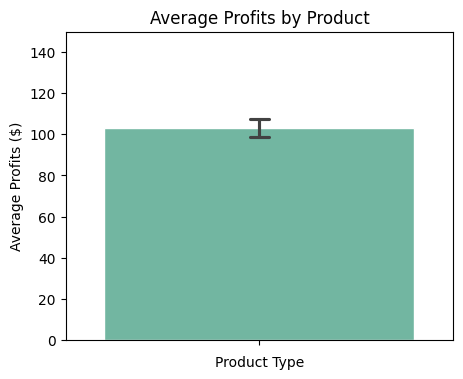

In [6]:
# Calculate confidence interval (to make sure the one on the plot looks right)
confInt = stats.t.ppf(0.975, df=numObs-1) * (np.std(prodProfits) / np.sqrt(numObs))

# Print out the confidence intervals to make sure it looks similar to the auto
# generated one from the graph
print('Conf Interval = ', np.mean(prodProfits) -confInt, np.mean(prodProfits) + confInt)

# Actual Plot
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.set_theme(style="whitegrid", palette = 'Set2') # Add a theme and we can move the palette here as well
sns.barplot(data=prodDF, hue = 'Type', y='Profits', errorbar=("se", 2), capsize=.05) # Here is where we can add the 95% CI's
plt.xlabel('Product Type')
plt.ylabel('Average Profits ($)')
plt.ylim([0, 150])
plt.legend().remove() # Remove the legend
plt.title('Average Profits by Product') # Add a title
plt.show()

Next let's add the individual observations using "stripplot"

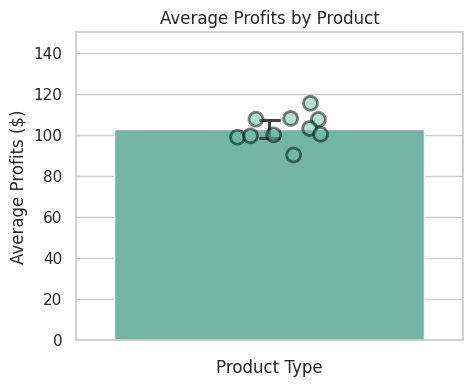

In [7]:
# Actual Plot
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.set_theme(style="whitegrid", palette = 'Set2')
sns.barplot(data=prodDF, hue = 'Type', y='Profits', errorbar=("se", 2), capsize=.05)
sns.stripplot(data=prodDF, hue='Type', y='Profits', size = 10,
              edgecolor ='k', linewidth=2, alpha = .5, jitter = .15)
plt.xlabel('Product Type')
plt.ylabel('Average Profits ($)')
plt.ylim([0, 150])
plt.legend().remove()
plt.title('Average Profits by Product')
plt.show()

## Plotting Data with multiple categories

Next step - let's add multiple categories to our simulated dataset.

In [8]:
# Update Data frame using same logic as above. We'll add two additional product types
prodProfits_B = np.random.normal(loc=70, scale=10, size=numObs)
prodProfits_C = np.random.normal(loc=130, scale=10, size=numObs)


# Create a new rows as a DataFrame
new_row_b = pd.DataFrame({'Profits': prodProfits_B, 'Type': 'Product B'})
new_row_c = pd.DataFrame({'Profits': prodProfits_C, 'Type': 'Product C'})

# Check the head to make sure it looks similar
new_row_b.head()

# Concatenate the new rows into the older data frame
prodDF = pd.concat([prodDF, new_row_b, new_row_c], ignore_index=True)

Next let's updated our graph with the multiple categories. Here we'll update both barplot and stripplot with an x argement and a hue argument. Let's also remove the gridlines and add our color palette in the sns.set_theme argument, the capsize argument in barplot, and the jitter argument in stripplot

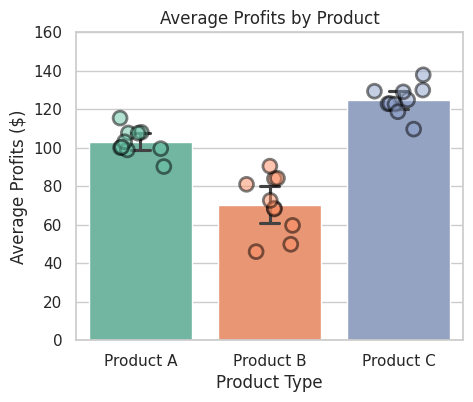

In [9]:
# Actual Plot
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.set_theme(style="whitegrid", palette = 'Set2', rc={"grid.linestyle":''})
sns.barplot(data=prodDF, x = 'Type', hue='Type', y='Profits', errorbar=("se", 2), capsize=.15)
sns.stripplot(data=prodDF, x='Type', hue= 'Type', y='Profits', size = 10,
              edgecolor ='k', linewidth=2, alpha = .5, jitter = .2)
plt.xlabel('Product Type')
plt.ylabel('Average Profits ($)')
plt.ylim([0, 160]) # We'll also update the y limit
#plt.legend().remove()
plt.title('Average Profits by Product')
plt.show()

Note - obviously profits aren't the only thing we might want to visualize for each product. We could also add the cost (here we're assuming the cost varies for each individual product - probably a weird assumption but whatever.). Let update our dataset with the costs - and reorganize the dataset a bit.

In [10]:
# Just in case you run this twice - we'll create a new dataframe so we have a
# copy of the original
prodDF2 = prodDF

# First we'll change the title of the "Profits" column (this will be important later)
prodDF2 = prodDF2.rename(columns={'Profits': 'Money'})

# Next we'll add a column to specify the numbers in the new "Money" column is profits
prodDF2['Category'] = 'Profits'


# Here we'll create some random costs for the three products. Let's assume it's
# lower than the profits but a little bit
prodCost_A = np.random.normal(loc=50, scale=15, size=numObs)
prodCost_B = np.random.normal(loc=30, scale=15, size=numObs)
prodCost_C = np.random.normal(loc=80, scale=15, size=numObs)

# Concatinate all of them together
prodCost = np.hstack([prodCost_A, prodCost_B, prodCost_C])

# Next we'll want to create product labels for each cost
label_A = ['Product A'] * numObs
label_B = ['Product B'] * numObs
label_C = ['Product C'] * numObs

# Concatinate them together
labels = label_A + label_B + label_C

# Create a new rows as a DataFrame
new_row_cost = pd.DataFrame({'Money': prodCost, 'Type': labels, 'Category': 'Cost'})

# Check the head to make sure it looks similar
print(new_row_cost.head())
print(prodDF2.head())

# Concatenate the new rows into the older data frame
prodDF2 = pd.concat([prodDF2, new_row_cost], ignore_index=True)


       Money       Type Category
0  60.965562  Product A     Cost
1  39.588396  Product A     Cost
2  53.717883  Product A     Cost
3  43.521732  Product A     Cost
4  48.754560  Product A     Cost
        Money       Type Category
0  100.033520  Product A  Profits
1   98.883123  Product A  Profits
2  108.016931  Product A  Profits
3   90.232323  Product A  Profits
4  107.685950  Product A  Profits


Now we'll replot everything. We'll want to update some of the arguments for our figures (see the hue is now category), change some of the visualization arguments, and update our legend and (for now) place it outside the plot itself.

We'll add dodge to our stripplot

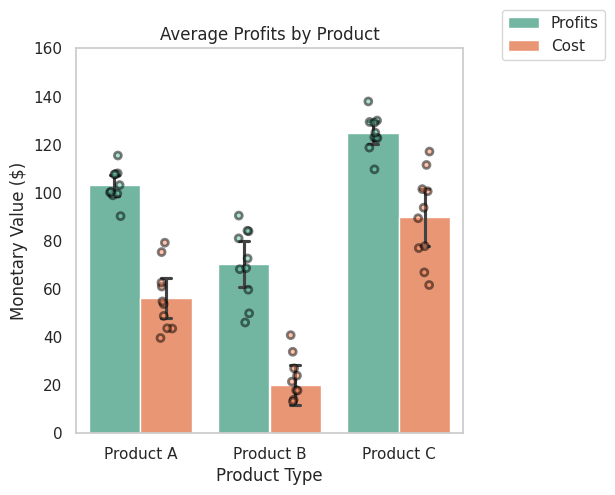

In [11]:
# Actual Plot
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.set_theme(style="whitegrid", palette = 'Set2', rc={"grid.linestyle":''})
bar = sns.barplot(data=prodDF2, x ='Type', hue='Category', y='Money', errorbar=("se", 2), capsize=.15)
strip = sns.stripplot(data=prodDF2, x='Type', hue='Category', y='Money', size = 5,
              edgecolor ='k', linewidth=2, alpha = .5, jitter = .1, dodge=True)
plt.xlabel('Product Type')
plt.ylabel('Monetary Value ($)') #We've changed this
plt.ylim([0, 160])
# Get the handles and labels
handles, labels = bar.get_legend_handles_labels()
# We'll need to only handle the first two elements of the legend
# (not the individual observations)
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.1, 1.1), loc=2, borderaxespad=0.)
plt.title('Average Profits by Product')
plt.show()

## Using Plotly

So we've got a decent graph, next thing we can try is to add some additional features with "plotly". Now we can hover over the bars to get the averages/categories.

Two things to note:
1. "Hue" in seaborn is now color
2. Plottly prefers to compute the average prior to plotting, so we'll do that in the dataframe arguement ("groupby" for our two categories: Type, Category).



In [12]:
# Actual Plotting
figure = px.bar(prodDF2.groupby(['Type', 'Category']).mean().reset_index(),
    x="Type",
    y="Money",
    color='Category',
    barmode='group') # We just need the money column
figure.show()

Last thing we'll do is add the error bars, the individual observations, and make some changes so it looks like our seaborne plot.

 First, we'll have to calculate the error bar values manually (at least as far as I can tell). Second, we'll first plot the data using stripplot, then add two "traces" from individual bar plots. Note, I'm not going to walkthrough all the steps (it's involved!) but I've placed comments around what is happening.

In [13]:
# Compute Average and Manually Calculate Errorbar
avgDF = prodDF2.groupby(['Type', 'Category']).mean().reset_index()
errorbar_value = prodDF2.groupby(['Type', 'Category']).std().reset_index()

# Set up category labels
cat = ['Product A', 'Product B', 'Product C']

# Isolate cost and profits - needed for the bar plot trace
avgDF_Profit = avgDF[avgDF['Category'] == 'Profits']
avgDF_Cost = avgDF[avgDF['Category'] == 'Cost']

# Compute Error bars
errorDF_Profit = errorbar_value[errorbar_value['Category'] == 'Profits']
errorDF_Cost = errorbar_value[errorbar_value['Category'] == 'Cost']

# Plot the Strip Plot
fig2 = px.strip(prodDF2, x="Type", y='Money', color="Category",
                color_discrete_sequence = n_colors('rgb(102, 193, 163)', 'rgb(250, 140, 97)', 2, colortype = 'rgb'))

# Add Jitter to markers, specify the size, add a border around them, update opacity
fig2.update_traces(jitter=0.5, marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey'), opacity=0.5))

# Update background so it's white
fig2.update_layout(plot_bgcolor='white')

# Update Axes
fig2.update_xaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='white' )
fig2.update_yaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgrey')

# Update Axis Labels
fig2.update_layout(xaxis_title="Product Type", yaxis_title="Monetary Value ($)")

# Update Title
fig2.update_layout(title_text="Average Profits by Product", title_x=0.5)


# Here we add traces for each bar plot
fig2.add_trace(go.Bar(name='Profit',
    x=cat, y=avgDF_Profit.Money,
    error_y=dict(type='data', array=errorDF_Profit.Money),
    marker={'color': 'rgba(102, 193, 163, 1)'},
    showlegend=False
))

fig2.add_trace(go.Bar(name='Cost',
    x=cat, y=avgDF_Cost.Money,
    error_y=dict(type='data', array=errorDF_Cost.Money),
    marker={'color': 'rgba(250, 140, 97, 1)'},
    showlegend=False
))

fig2.show()


# Figure 2 - Histograms and DistPlots

For our next set of plots, we'll be comparing how many purchases of two products (product A and B) across different groups (for example, demographic).

Here, we'll be interested in seeing if there are any distributional differences. The first set of plots we'll make will be histograms, before moving on to Dist (Distribution) Plots.

We'll imagine we've got sales data where people are asked where they heard about the product(internet ads from Google vs Facebook) grouped by two different populations (Alberta vs British Columbia). For the histogram we'll also need two numerical variables (for the x and y axis).



## Question we want to answer:
**How effective were our different ad types and are there any differences between the two groups we were trying to advertise to?**

## Data Simulation Set up

Again we'll be setting up a dataframe as it makes it easier for plotting using pandas and plotly. Each row is again one observation. Two columns will be our grouping variables:
1.   where they heard about it (Facebook vs Google Ads)
2.   their location (Alberta vs British Columbia)

Two additional columns will be:
3. The sign-up price they paid for the product (in dollars)
4. The number of times they've renewed their yearly contract

In [14]:
# Number of observations we have
numObs = 10000

# Unlike before, we're going to generate our obserations from a Gamma
# distribution. It will make sense later when we plot everything
# Note 1: AB = Alberta, BC = British Columbia, F = facebook, G = Google
# Note 2: We're going to round the observations
sales_AB_F = np.round(np.random.gamma(shape=6, scale=3, size=numObs)+45)
sales_AB_G = np.round(np.random.gamma(shape=2, scale=3, size=numObs)+60)
sales_BC_F = np.round(np.random.gamma(shape=2, scale=3, size=numObs)+50)
sales_BC_G = np.round(np.random.gamma(shape=9, scale=3, size=numObs)+60)

# Number of times each person renewed their data
renew_AB_F = np.random.poisson(lam=1, size=numObs)
renew_AB_G = np.random.poisson(lam=5, size=numObs)
renew_BC_F = np.random.poisson(lam=1, size=numObs)
renew_BC_G = np.random.poisson(lam=5, size=numObs)

# Combine all these together
# The logic goes; Alberta-Facebook, Alberta-Google, BC-Facebook, BC-Google
sales_cum = np.hstack([sales_AB_F, sales_AB_G, sales_BC_F, sales_BC_G])
renew_cum = np.hstack([renew_AB_F, renew_AB_G, renew_BC_F, renew_BC_G])

# Generate the labels for province first
labels_AB = ['AB'] * numObs*2
labels_BC = ['BC'] * numObs*2

# Add the type of ad labels
labels_F = ['F'] * numObs
labels_G = ['G'] * numObs

# Concatine labels together
# Note that we do Facebook, google, facebook, google
concate_loc = labels_AB + labels_BC
concate_type = labels_F + labels_G + labels_F + labels_G

# Create a new rows as a DataFrame
ad_Data = pd.DataFrame({'Location': concate_loc, 'Type': concate_type,'Sales': sales_cum, 'Renew':renew_cum})

# Print out the first few rows to make sure all looks good
ad_Data.head()

Location Type  Sales  Renew
0       AB    F   56.0      0
1       AB    F   59.0      0
2       AB    F   56.0      1
3       AB    F   66.0      1
4       AB    F   60.0      1

## Plotting Data using Histogram
First we'll start with a simple histogram of all our sales data together

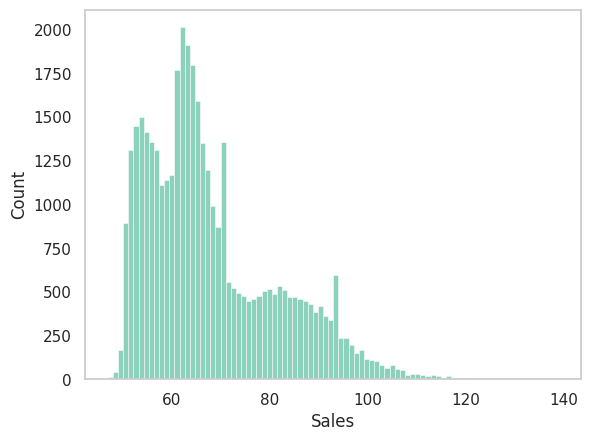

In [15]:
sns.histplot(data=ad_Data, x='Sales')
plt.show()

Alright, that isn't too meaningful. Let's now split our data into province

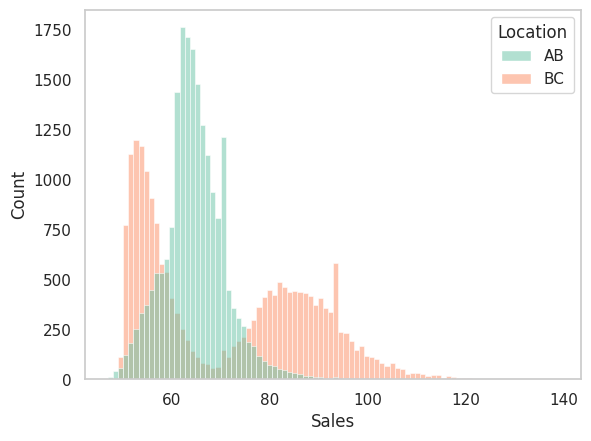

In [16]:
sns.histplot(data=ad_Data, x='Sales', hue='Location')
plt.show()

Now we can play around with some of the arguments for the histogram.
Let's first change the number of bins, modify the colors (as we did before), add some descriptive labels

/tmp/ipython-input-17-3481827021.py:4: UserWarning:

The palette list has more values (9) than needed (2), which may not be intended.



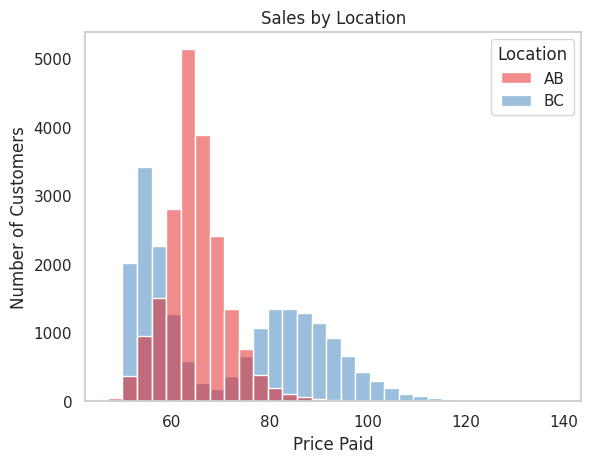

In [17]:
newColor = sns.color_palette("Set1")

# Actual Plot
sns.histplot(data=ad_Data, x='Sales', hue='Location', palette=newColor, binwidth=3)
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales by Location')
plt.show()

## Plot using Subplots

Here we're going to plot our two grouping variables on two different subplots to compare. First, we'll call the figure and axis arguements first. Then we can specify where on the figure we'd like to plot all our additional information. We'll also use the "share y" arguement to make sure the limits and text on our two y axis are shared (they are the same).



/tmp/ipython-input-18-3312387516.py:6: UserWarning:

The palette list has more values (9) than needed (2), which may not be intended.

/tmp/ipython-input-18-3312387516.py:11: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



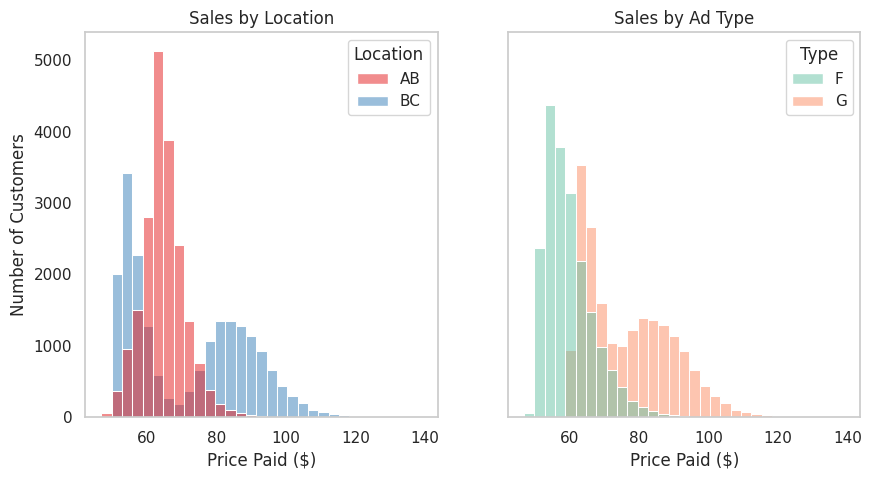

In [18]:
newColor2 = sns.color_palette("Set2")


fig, axes = plt.subplots(1, 2, figsize=(10, 5),sharey=True)
# Figure 1
sns.histplot(ax=axes[0], data=ad_Data, x='Sales', hue='Location', palette=newColor, binwidth=3)
axes[0].set_xlabel('Price Paid ($)')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Sales by Location')
# Figure 2
sns.histplot(ax=axes[1], data=ad_Data, x='Sales', hue='Type', palette=newColor2, binwidth=3)
axes[1].set_xlabel('Price Paid ($)')
axes[1].set_title('Sales by Ad Type')
plt.show()

There are additional ways of doing this. We can just formally call the subplot arguement as well. Subplot works like the fig, axes call we made. Rows by Columns, and then the last number is the location on the subplot (1 = first, 2 = second, etc.)

/tmp/ipython-input-19-1974225778.py:2: UserWarning:

The palette list has more values (9) than needed (2), which may not be intended.

/tmp/ipython-input-19-1974225778.py:8: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



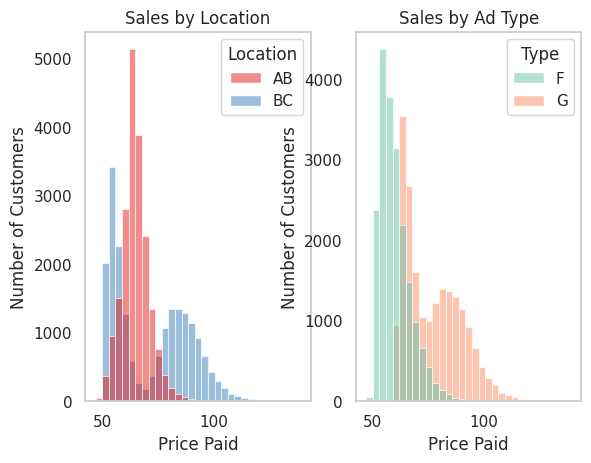

In [19]:
plt.subplot(1,2,1)
sns.histplot(data=ad_Data, x='Sales', hue='Location', palette=newColor, binwidth=3)
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales by Location')
plt.subplot(1,2,2)
newColor2 = sns.color_palette("Set2")
sns.histplot(data=ad_Data, x='Sales', hue='Type', palette=newColor2, binwidth=3)
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales by Ad Type')
plt.show()

Hmm, that doesn't look great...lets gussy it up a bit!
We'll make sure the two plots share their y axis (see plt.subplot) and we'll add a command to tighten the plot up a bit!

This is good in go to have, but if we modify our dataframe's labels - we can actually plot this all on one plot! First, we'll modify the data labels, and then it's time for plotting. We'll also add a step function to help look a bit better.

/tmp/ipython-input-20-407039152.py:13: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



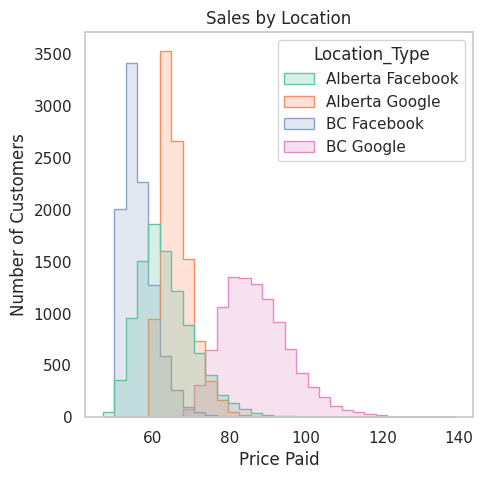

In [20]:
# Create New Labels
# Add the type of ad labels
labels_AB_F = ['Alberta Facebook'] * numObs
labels_AB_G = ['Alberta Google'] * numObs
labels_BC_F = ['BC Facebook'] * numObs
labels_BC_G = ['BC Google'] * numObs

# Add to dataframe
ad_Data['Location_Type'] = labels_AB_F + labels_AB_G + labels_BC_F + labels_BC_G

# Now Plot the rest
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(data=ad_Data, x='Sales', hue='Location_Type', palette=newColor2, binwidth=3, element='step')
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales by Location')
plt.show()

## Plot using DisPlot
Another option we can use for plotting the data is known as a displot (or distplot). It functions in a very similar to the histogram - but it plots the density of the distribution - so let's try that out now.

/tmp/ipython-input-21-2216112225.py:2: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



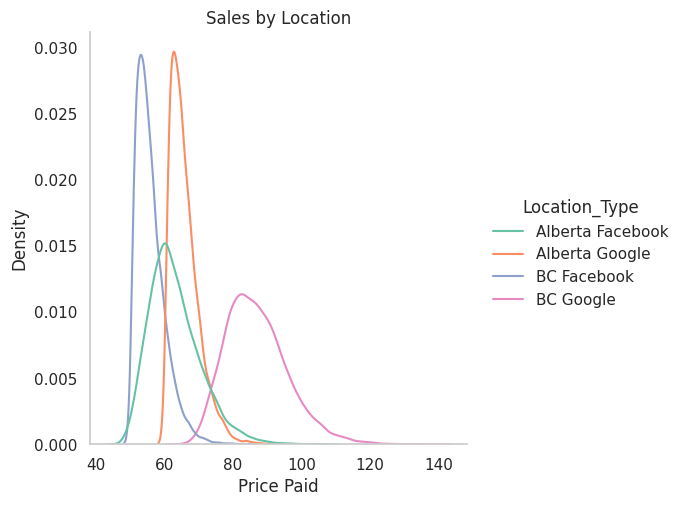

In [21]:
# Now Plot the rest
sns.displot(data=ad_Data, x='Sales', hue='Location_Type', palette=newColor2, kind="kde")
plt.xlabel('Price Paid')
plt.ylabel('Density')
plt.title('Sales by Location')
plt.show()

We can actually play around with the displot arguements to get it to generate an identical plot to the histogram! Let's call both plot types now. We just need to update our "kind" arguement to "hist" (and we'll add our additional arguements as well)

/tmp/ipython-input-22-1590463532.py:2: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



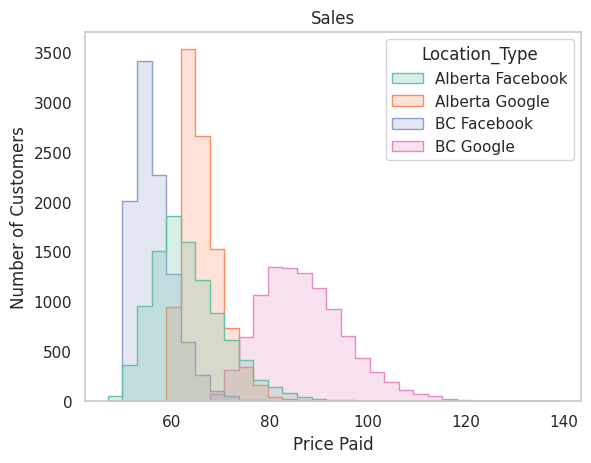

/tmp/ipython-input-22-1590463532.py:9: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



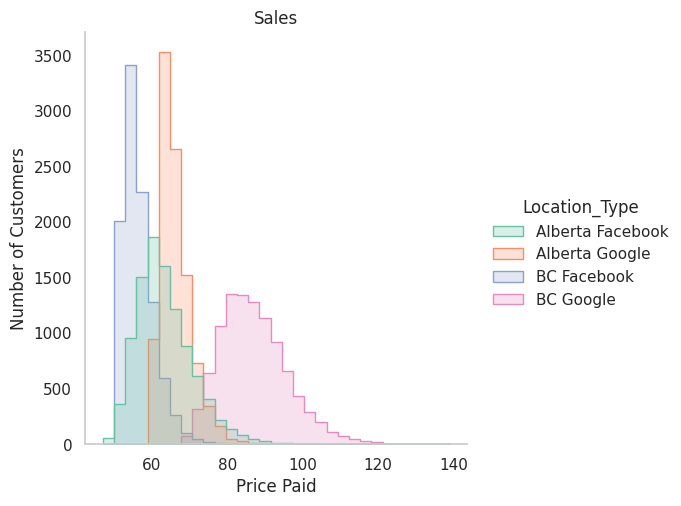

In [22]:

# Histogram
sns.histplot(data=ad_Data, x='Sales', hue='Location_Type', palette=newColor2, binwidth=3, element='step')
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales')
plt.show()

# Distplot
sns.displot(data=ad_Data, x='Sales', hue='Location_Type', palette=newColor2, kind='hist', binwidth=3, element='step')
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales')
plt.show()

We can even add the "kde" command to the histogram (kde = kernal density estimate; just a smoothing procedure that shows our probability distribution)

/tmp/ipython-input-23-2155865087.py:2: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



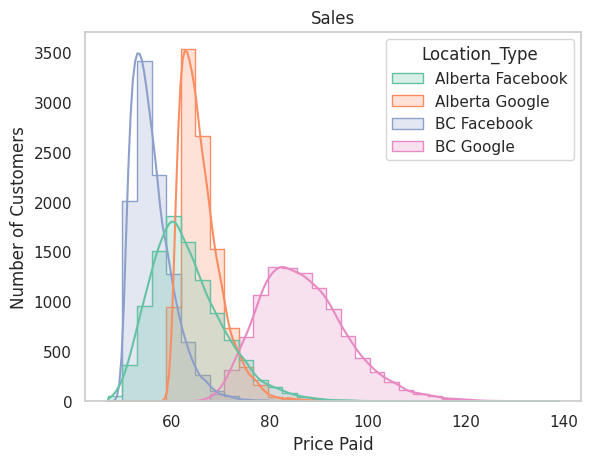

/tmp/ipython-input-23-2155865087.py:9: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



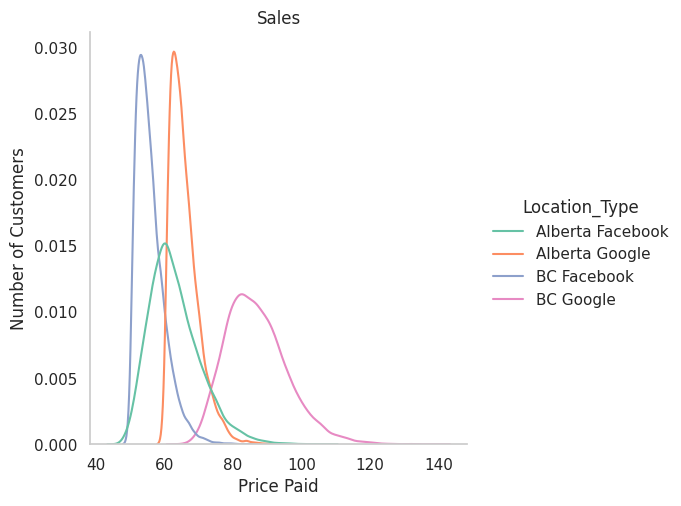

In [23]:
# Histogram
sns.histplot(data=ad_Data, x='Sales', hue='Location_Type', palette=newColor2, kde=True, binwidth=3, element='step')
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales')
plt.show()

# Distplot
sns.displot(data=ad_Data, x='Sales', hue='Location_Type', palette=newColor2, kind='kde')
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales')
plt.show()

I generally prefer to use the histogram rather than displot. Displot seems to be unable to plot within a subplot, and the histogram has pretty much all the features we might enjoy adding from displot (as far as I can tell!)

## Adding Labels/Additional Information

The last thing we'll update is adding some labels such as the mean/totals values to our histogram. Let's increase our y axis, add the mean and sum of each distribution, and add some small labels for mean/sum.

/tmp/ipython-input-24-1115677378.py:24: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-24-1115677378.py:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



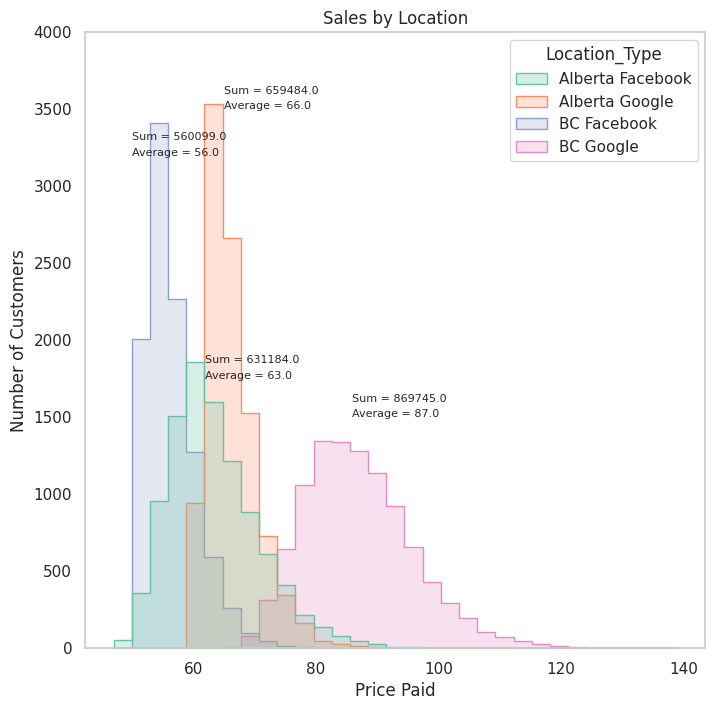

In [24]:
# Let's compute the sum and mean for each observation
# Note the rounding as well
sumVals = np.round(ad_Data.groupby('Location_Type')['Sales'].sum())
meanVals = np.round(ad_Data.groupby('Location_Type')['Sales'].mean())

# Let's create labels
textLabels = ['Hi', 'Hi1', 'Hi2', 'Hi3']

# And let's update the x and y coordinates (I had to play around with the
# spacing to add these properly)
xcoord = [62, 65, 50, 86]
ycoord = [1750, 3500, 3200, 1500]

# Histogram
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
sns.histplot(data=ad_Data, x='Sales', hue='Location_Type', palette=newColor2[0:4], binwidth=3, element='step')
plt.xlabel('Price Paid')
plt.ylabel('Number of Customers')
plt.title('Sales by Location')
# Let's update the y axis limits
plt.ylim([0, 4000])
# Here is where we add our labels - note the use of the "for loop"
for i in range(4):
  plt.text(xcoord[i], ycoord[i], 'Average = ' + str(meanVals[i]), fontsize = 8)
  plt.text(xcoord[i], ycoord[i]+100, 'Sum = ' + str(sumVals[i]), fontsize = 8)
plt.show()

Interesting! We can see that despite costing the most on average, the Google ads in British Columbia generate the most revenue.

## Plotly for Histogram/Displot

Last thing we'll do is make a more interactive plot using plotly. Again, I won't go into too much detail here just to keep it simple. The "marginal" call is where we will add a box plot above the histogram (this could be a rug or violin). It'll show us some descriptive information about our plots.

We'll also use Plotly's built in color picker to change the colors

In [25]:
# Here is the plot
fig = px.histogram(ad_Data, x="Sales", color="Location_Type", marginal="box",
                   nbins=100, hover_data=ad_Data.columns,
                   color_discrete_sequence=px.colors.qualitative.Vivid,
                   barmode="overlay")

# Update background so it's white
fig.update_layout(plot_bgcolor='white')

# Update Axes
fig.update_xaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='white' )
fig.update_yaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgrey')

# Update X and Y Axis Labels
fig.update_layout(xaxis_title="Price Paid ($)", yaxis_title="Number of Customers")

# Update Title
fig.update_layout(title_text="Ad Sales by Location and Type", title_x=0.5)
fig.show()

## Displot using Figure Factory
This is just a simple plot, but we can add the overlay of the curves using Figure Factory in Plotly. This is a somewhat different type of approach, which can be used for plotting features which are a bit more advanced. I have added some custom colors and changed the bin size (this can be done individually for each group, as I've done here).

You can also do things like remove the histogram if you want and just have the KDE's present.

In [26]:
# Figure Factory Test?
import plotly.figure_factory as ff

# Update Colors - I just choose these manually
colors = ['#ff7f0e', '#2ca02c', '#9467bd', '#d62728']

# We need to re-organize the data a bit here. Note that this just splits all of
# our location and types with their sales data
hist_data = [ad_Data[ad_Data['Location_Type'] == 'Alberta Facebook']['Sales'],
             ad_Data[ad_Data['Location_Type'] == 'Alberta Google']['Sales'],
             ad_Data[ad_Data['Location_Type'] == 'BC Facebook']['Sales'],
             ad_Data[ad_Data['Location_Type'] == 'BC Google']['Sales']]

# Need to add group labels as well
group_labels = ['Alberta Facebook', 'Alberta Google', 'BC Facebook', 'BC Google']


# Create distplot using factory figure
fig = ff.create_distplot(hist_data, group_labels, colors=colors, bin_size=[3, 1, 1, 5])

# Update background so it's white
fig.update_layout(plot_bgcolor='white')

# Update Axes
fig.update_xaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='white' )
fig.update_yaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgrey')

# Update X and Y Axis Labels
fig.update_layout(xaxis_title="Price Paid ($)", yaxis_title="Density")

# Update Title
fig.update_layout(title_text="Ad Sales by Location and Type", title_x=0.5)
fig.show()

# Figure 3 - Line and Time Series Plots

For the next set of plots, we'll be looking at line/time series plots. In this case, these plots are great at showing how data changes or evolves across a series of (linked) observations. It's good for showing trends essentially.

For this next type of plots, we'll be looking at how stock prices (for some different companies) change across time.



## Question we want to answer
**Are there any obviouse trends we can glean from comparing three different companies stock prices across a twenty five year span?**

These companies are: a car maker, an internet service company, and company that sells CD's.

## Data Simulation Set up
This one is going to be a bit more involved....

In [27]:
#from pydoc import ispackage
# Number of observations we'll have
numYears = 25
numWeeks = 12
# Both Together
numObs = numYears * numWeeks

# Here we are going to make some random walks for each stock. To do this, we'll
Auto_Stock = np.zeros(shape=numObs)
ISP_Stock = np.zeros(shape=numObs)
CD_Stock = np.zeros(shape=numObs)

# Starting Values
Auto_Stock[0] = 125
ISP_Stock[0] = 50
CD_Stock[0] = 95

# We'll set up some noise values too
# Noise parameters
Auto_Mean = 0
ISP_Mean = 0
CD_Mean = 0
std_dev = 0.7 # Adjust for noise level

# Hinge Points
hinge1 = 8*numWeeks
hinge2 = 10*numWeeks
hinge3 = 20*numWeeks

# Random Start Values
Auto_Rand = .6
ISP_Rand = .9
CD_Rand = .5

# use a for loop. I've built in some trends for each stock
for i in range(1, numObs):

  if i == hinge1:
    # Update Car
    Auto_Rand = .99
    Auto_Mean = -1.4

    # Update ISP
    ISP_Rand = .99
    ISP_Mean = -1.2

    # Update CD
    CD_Rand = .99
    CD_Mean = -1

  elif i == hinge2:

        # Update Car
    Auto_Rand = .99
    Auto_Mean = .3

    # Update ISP
    ISP_Rand = .8
    ISP_Mean = .6

    # Update CD
    CD_Rand = .9
    CD_Mean = -.2

  elif i == hinge3:

    # Update Car
    Auto_Rand = .9
    Auto_Mean = .8

    # Update ISP
    ISP_Rand = .5
    ISP_Mean = 1.5

  # Car
  if np.random.rand() > Auto_Rand:
    Auto_Stock[i] = Auto_Stock[i-1] + np.random.normal(Auto_Mean, std_dev) + np.random.beta(1, 3)
  else:
    Auto_Stock[i] = Auto_Stock[i-1] + np.random.normal(Auto_Mean, std_dev) #+ np.random.beta(1, 3)

  # ISP
  if np.random.rand() >ISP_Rand:
    ISP_Stock[i] = ISP_Stock[i-1] + np.random.normal(ISP_Mean, std_dev) + np.random.beta(1, 3)
  else:
    ISP_Stock[i] = ISP_Stock[i-1] + np.random.normal(ISP_Mean, std_dev) #+ np.random.beta(1, 3)

  # CD
  if np.random.rand() > .9:
    CD_Stock[i] = CD_Stock[i-1] + np.random.normal(CD_Mean, std_dev) + np.random.beta(3, 3)
  else:
    CD_Stock[i] = CD_Stock[i-1] + np.random.normal(CD_Mean, std_dev) #+ np.random.beta(1, 3)

# Combine together
stock_cum = np.hstack([Auto_Stock, ISP_Stock, CD_Stock])

# # Generate the labels for each stock
labels_Auto = ['Auto'] * numObs
labels_ISP = ['ISP'] * numObs
labels_CD = ['CD'] * numObs

# Concatine labels together
labels = labels_Auto + labels_ISP + labels_CD

# Create Date labels
date = pd.date_range("2000-01-01", periods=numObs, freq="ME")

# Repeat them 3 times (for each stock)
date2 = np.hstack([date, date, date])

# Create a new rows as a DataFrame
stock_Data = pd.DataFrame({'Stock_Labels': labels, 'Date':date2, 'Stock Price': stock_cum})

# Print out the first few rows to make sure all looks good
stock_Data.head()

Stock_Labels       Date  Stock Price
0         Auto 2000-01-31   125.000000
1         Auto 2000-02-29   124.101608
2         Auto 2000-03-31   124.197197
3         Auto 2000-04-30   124.637579
4         Auto 2000-05-31   124.956504

## Plotting Data using Lineplot

Here we'll start with a simple lineplot with a legend.

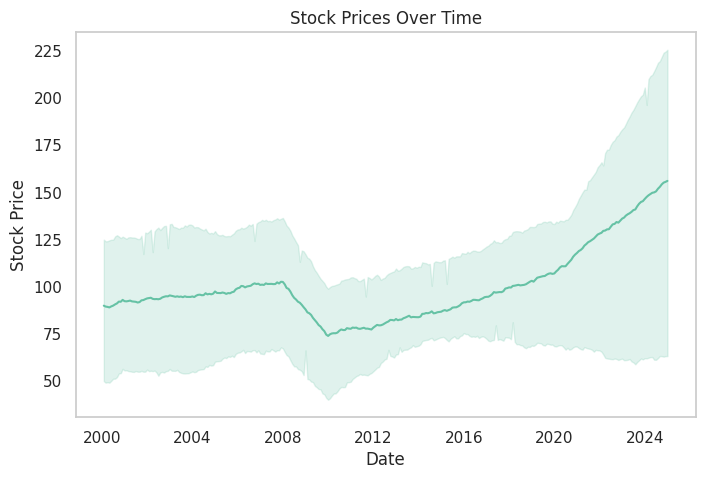

In [28]:
# Generate Actual Plot
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.lineplot(data=stock_Data, x='Date', y='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.show()

Well that looks odd...probably because we didn't seperate our stocks into the three categories (hint the max and the min of the blue area are the lowest and highest priced stocks). Now let's try to split the data by the stock type.

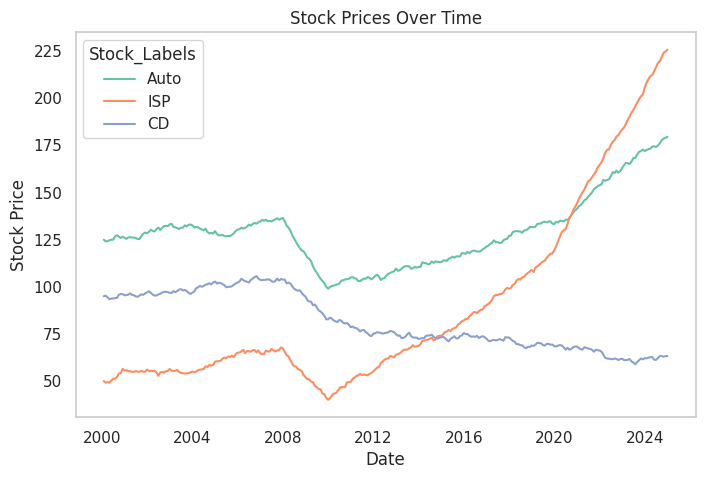

In [29]:
# Generate Actual Plot
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.lineplot(data=stock_Data, x='Date', y='Stock Price', hue='Stock_Labels')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.show()

## Adding Trend lines and vertical Lines with Labels
Let's update our graph with some trendlines for each of our three stocks. We'll first calculate the coefficiants and then use a polynomial function to create the line. Let's assume a linear fit (but this can be easily updated!). We'll use the following formula:
$$y = ax + b $$


Time/Date data can be hard to work with in Python. As such, we'll use a dummy variable as well (note: the range(len(data frame)). Basically we just want the number of points of the dataset, rather than the specific dates.

We also might want to add certain meaningful events to our line plot. Some big events would be: the global financial crisis and COVID-19. We'll use somewhat general starting points (e.g., financial crisis = 2008; COVID = 2020). Of course, you may think of others!

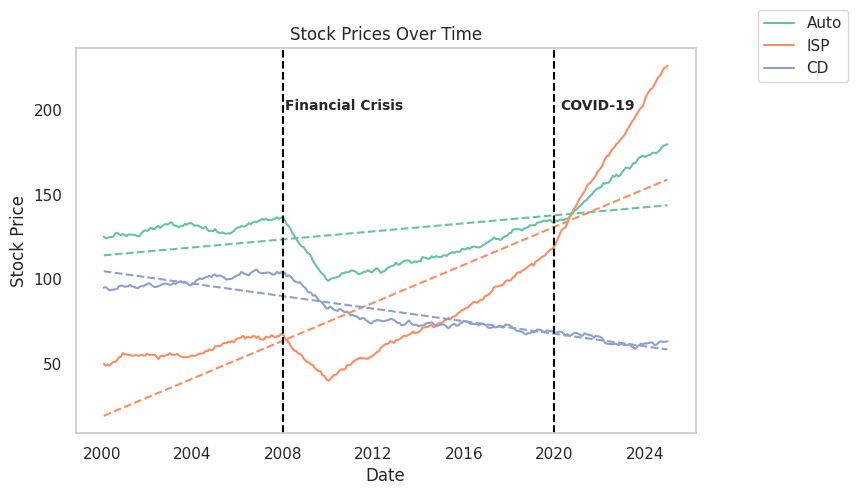

In [30]:
pd.options.mode.chained_assignment = None  # default='warn'

# Seperate Data into each of the three stocks
stock_Auto = stock_Data[stock_Data['Stock_Labels'] == 'Auto']
stock_ISP = stock_Data[stock_Data['Stock_Labels'] == 'ISP']
stock_CD = stock_Data[stock_Data['Stock_Labels'] == 'CD']

# Next create dummy variables (we'll use these in a sec, but they're all
# identical)
stock_Auto.loc[:, 'Time_Dummy'] = range(len(stock_Auto))
stock_ISP.loc[:, 'Time_Dummy'] = range(len(stock_ISP))
stock_CD.loc[:, 'Time_Dummy'] = range(len(stock_CD))

# First we select what type of fit we want
fit_Num = 1

# Generate Coefficiants for each group first
coef_Auto = np.polyfit(stock_Auto['Time_Dummy'], stock_Auto['Stock Price'], fit_Num)
coef_ISP = np.polyfit(stock_ISP['Time_Dummy'], stock_ISP['Stock Price'], fit_Num)
coef_CD = np.polyfit(stock_CD['Time_Dummy'], stock_CD['Stock Price'], fit_Num)

# Create the lines
trend_Auto = coef_Auto[0] * stock_Auto['Time_Dummy'] + coef_Auto[1]
trend_ISP = coef_ISP[0] * stock_ISP['Time_Dummy'] + coef_ISP[1]
trend_CD = coef_CD[0] * stock_CD['Time_Dummy'] + coef_CD[1]

# Next let's update our dataframe for each trend
trend_All = np.hstack([trend_Auto, trend_ISP, trend_CD])
stock_Data['Trend'] = trend_All

# Let's add some better colors first
newColor2 = sns.color_palette("Set2")

# Generate Plot
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
plot1 = sns.lineplot(data=stock_Data, x='Date', y='Stock Price', hue='Stock_Labels', palette=newColor2[0:3])
# Plot the polynomials
plot2 = sns.lineplot(data=stock_Data, x='Date', y='Trend', hue='Stock_Labels', palette=newColor2[0:3], linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
# Now we add vertical lines at each of our events, followed by labels
# Financial Crisis
plt.axvline(x=pd.to_datetime('2008-01-01'), color='black', linestyle='--')
plt.text(pd.to_datetime('2008-02-01'), 200, "Financial Crisis", fontsize=10, fontweight='bold')
# COVID
plt.axvline(x=pd.to_datetime('2020-01-01'), color='black', linestyle='--')
plt.text(pd.to_datetime('2020-04-01'), 200, "COVID-19", fontsize=10, fontweight='bold')
# Update legend to only plot first three
# Get the handles and labels
handles, labels = plot1.get_legend_handles_labels()
# We'll need to only handle the first three elements of the legend
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.1, 1.1), loc=2, borderaxespad=0.)
plt.show()

So our trend lines with our stocks seem to suggest that both the ISP and Auto stock - although they take a small dip - generally increase. In contrast, our CD stock just gets worse. Based on this data, we would want to invest in the ISP and Auto stocks (with ISP best) but avoid the CD stock.

Let's also try a 2nd order polynomial fit. Here we'll have to update our regression equation from:
$$y = ax+b $$

to:

$$y = ax^2 + bx +c $$

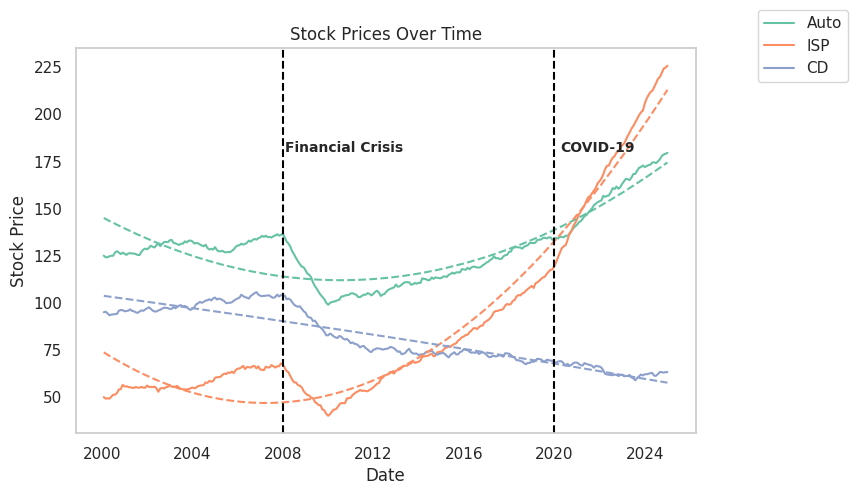

In [31]:
# Change the polynomial fit to 2nd
fit_Num = 2

# Generate Coefficiants for each group first
coef_Auto = np.polyfit(stock_Auto['Time_Dummy'], stock_Auto['Stock Price'], fit_Num)
coef_ISP = np.polyfit(stock_ISP['Time_Dummy'], stock_ISP['Stock Price'], fit_Num)
coef_CD = np.polyfit(stock_CD['Time_Dummy'], stock_CD['Stock Price'], fit_Num)

# Create the lines using the new formulas
trend_Auto_2 = coef_Auto[0] * (stock_Auto['Time_Dummy']**2) + coef_Auto[1]*stock_Auto['Time_Dummy'] + coef_Auto[2]
trend_ISP_2 = coef_ISP[0] * (stock_ISP['Time_Dummy']**2) + coef_ISP[1]*stock_ISP['Time_Dummy'] + coef_ISP[2]
trend_CD_2 = coef_CD[0] * (stock_CD['Time_Dummy']**2) + coef_CD[1]*stock_CD['Time_Dummy'] + coef_CD[2]

# Next let's update our dataframe for each trend
trend_Poly_2 = np.hstack([trend_Auto_2, trend_ISP_2, trend_CD_2])
stock_Data['Trend Poly 2'] = trend_Poly_2

# Generate Plot
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
plot1 = sns.lineplot(data=stock_Data, x='Date', y='Stock Price', hue='Stock_Labels', palette=newColor2[0:3])
# Plot the polynomials
plot2 = sns.lineplot(data=stock_Data, x='Date', y='Trend Poly 2', hue='Stock_Labels', palette=newColor2[0:3], linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
# Now we add vertical lines at each of our events, followed by labels
# Financial Crisis
plt.axvline(x=pd.to_datetime('2008-01-01'), color='black', linestyle='--')
plt.text(pd.to_datetime('2008-02-01'), 180, "Financial Crisis", fontsize=10, fontweight='bold')
# COVID
plt.axvline(x=pd.to_datetime('2020-01-01'), color='black', linestyle='--')
plt.text(pd.to_datetime('2020-04-01'), 180, "COVID-19", fontsize=10, fontweight='bold')
# Update legend to only plot first three
# Get the handles and labels
handles, labels = plot1.get_legend_handles_labels()
# We'll need to only handle the first three elements of the legend
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.1, 1.1), loc=2, borderaxespad=0.)
plt.show()

Interesting! Looks like the 2nd order polynomial provides a better fit for two of our stocks (ISP, Auto) but the first order still seems appropriate for the other stock (CD).

## Plotly for Lineplot

Last thing we'll do is - as per usual - plot our data using plotly because it gives us a bit more functionality. We'll even add a range slider, so we can zoom in on certain time periods and some options to only plot certain ranges of years.

In [32]:
# Lets reload go
# Here is the plot
fig = px.line(stock_Data, x="Date", y= 'Stock Price', color="Stock_Labels",
                   color_discrete_sequence=px.colors.qualitative.Vivid)

# Add the  range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)

# Update background so it's white
fig.update_layout(plot_bgcolor='white')

# Update Axes
fig.update_xaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='white' )
fig.update_yaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgrey')

# Update X and Y Axis Labels
fig.update_layout(xaxis_title="Date", yaxis_title="Stock Price ($)")

# Update Title
fig.update_layout(title_text="Stock Prices Over Time", title_x=0.5)
fig.show()

It is difficult to add trendlines to the lineplot, but we can do so by using Plotly's graph objects abilities. We are going to remove the range slider however (note: it is now False) because by adding the trend lines it crowds the range slider. We'll also add another label for the estimated stock prices that we calculated (so it appears in the legend).

In [33]:
# First we create new labels for the estimated stock price
labels_Auto_Est = ['Auto Trend'] * numObs
labels_ISP_Est = ['ISP Trend'] * numObs
labels_CD_Est = ['CD Trend'] * numObs

# Concatine labels together
labels_trend = labels_Auto_Est + labels_ISP_Est + labels_CD_Est

# Add to stock data
stock_Data['Trend Labels'] = labels_trend

# Here is the plot
fig = px.line(stock_Data, x="Date", y= 'Stock Price', color="Stock_Labels",
                   color_discrete_sequence=px.colors.qualitative.Vivid)

# Add the  range slider
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)

# Here is where we add the trendlines
# Let's start a counter to select the right color
i = 0
# Now we loop around the groups within the stock data frame
for group_name in stock_Data['Trend Labels'].unique():
    group_df = stock_Data[stock_Data['Trend Labels'] == group_name]
    fig.add_trace(go.Scatter(
        x=group_df['Date'],
        y=group_df['Trend Poly 2'],
        mode='lines',  # or 'lines', 'lines+markers'
        name=group_name,  # This will be used in the legend
        line=dict(dash='dash', width=2, color=px.colors.qualitative.Vivid[i]) # Change the line types

    ))
    # This is needed to select the proper color
    i = i + 1

# Update background so it's white
fig.update_layout(plot_bgcolor='white')

# Update Axes
fig.update_xaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='white' )
fig.update_yaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgrey')

# Update X and Y Axis Labels
fig.update_layout(xaxis_title="Date", yaxis_title="Stock Price ($)")

# Update Title
fig.update_layout(title_text="Stock Prices Over Time", title_x=0.5)
fig.show()

# Figure 4 - Scatter and bubble

Scatterplots (which we actually used earlier - see Figure 1), are useful for plotting the relationship between two numerical variables Importantly, we can use some additional arguements (the color and size of the bubbles) to visualize different variables (categorical or numerical) which impact the relationship between our two variables.

## Question we want to answer

**What is the relationship between the price of homes/condos being sold (in dollars) and the homeowner tax paid (in dollars) on the home?**

While at face value we might expect a simple linear relationship between our two variables, it could also be possible that once taxes get too high, the residence price starts to drop. Let's investigate this further.

## Data Simulation set-up
 In addition, we'll add two other variables - the city of the residences being sold and the number of bed rooms in the residence.

In [34]:
# We're going to generate data for three different cities (Toronto, Vancouver,
# Edmonton)
numObs = 100
stDev = 50000

# Let's generate our home prices first - we'll make it in four different groups (we'll see why later)
home_priceT = np.linspace(150000, 1000000, numObs)
home_priceV = np.linspace(100000, 900000, numObs)
home_priceE = np.linspace(80000, 800000, numObs)

# Let's calculate our tax bill
# Toronto is Asymptotic
taxT = (15000*(home_priceT**2) + home_priceT - 2000) / (home_priceT*(home_priceT+300000))
taxT = taxT + np.random.normal(0, 200, numObs) # Add some noise

# Vancouver is linear
taxV = (home_priceV / 75) + 1500
taxV = taxV + np.random.normal(0, 200, numObs) # Add some noise

# Edmonton is Parabolic
taxE = (home_priceE / 100)
taxE = -((taxE - 6000)**2/3000) + 10000
taxE = taxE + np.random.normal(0, 200, numObs) # Add some noise

# Now let's add number of bedrooms
bedT = np.zeros(numObs)
bedV = np.zeros(numObs)
bedE = np.zeros(numObs)

for i in range(0, numObs):
  if home_priceV[i] < 600000:
    bedT[i] = np.random.randint(1,3)
    bedV[i] = np.random.randint(1,3)
    bedE[i] = np.random.randint(1,3)
  else:
    bedT[i] = np.random.randint(2, 7)
    bedV[i] = np.random.randint(2, 7)
    bedE[i] = np.random.randint(2, 7)

# Add noise to home prices
home_priceT = home_priceT + np.random.normal(0, 10000, numObs)
home_priceV = home_priceV + np.random.normal(0, 10000, numObs)
home_priceE = home_priceE + np.random.normal(0, 10000, numObs)

# Last let's combine all our data together
city_labels = np.hstack([np.repeat('Toronto', numObs), np.repeat('Vancouver', numObs), np.repeat('Edmonton', numObs)])
home_price = np.hstack([home_priceT, home_priceV, home_priceE])
tax = np.hstack([taxT, taxV, taxE])
bed = np.hstack([bedT, bedV, bedE])

# And add to dataframe
home_Data = pd.DataFrame({'City': city_labels, 'Home Price': home_price, 'Tax': tax, 'Bedrooms': bed})

## Plotting Data using Scatterplot
First we'll start with the simple X and Y relationship between our two variables. Let's put the tax paid as X and the home prices as Y.

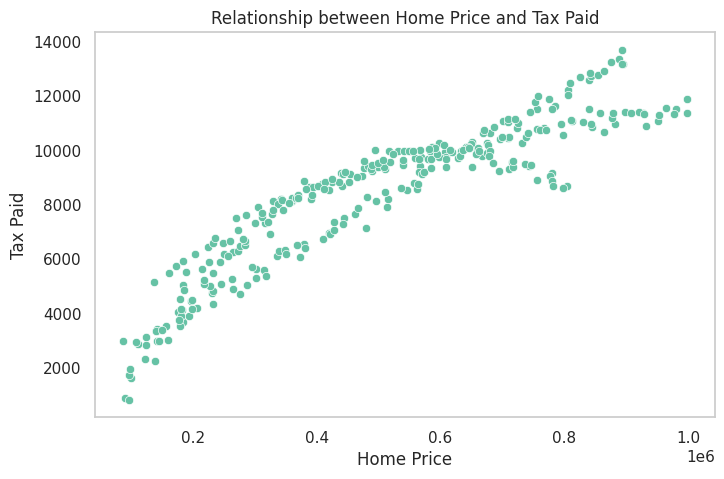

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.scatterplot(data=home_Data, x='Home Price', y='Tax')
plt.xlabel('Home Price')
plt.ylabel('Tax Paid')
plt.title('Relationship between Home Price and Tax Paid')
plt.show()

Now let's add the hue arguement to add the city

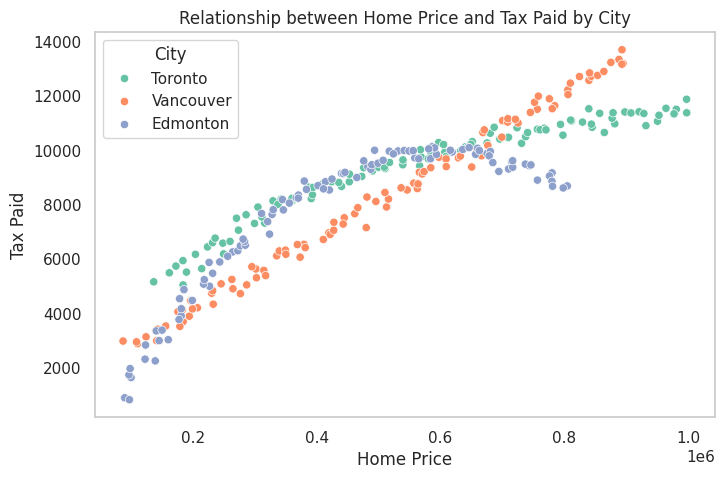

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.scatterplot(data=home_Data, x='Home Price', y='Tax', hue='City')
plt.xlabel('Home Price')
plt.ylabel('Tax Paid')
plt.title('Relationship between Home Price and Tax Paid by City')
plt.show()

Next let's add the number of room as a size arguement for the circles on the plot. We'll also add the alpha arguement so we can see different circles. Finally, we'll fix the color and x-axis values (ticklabel_format).

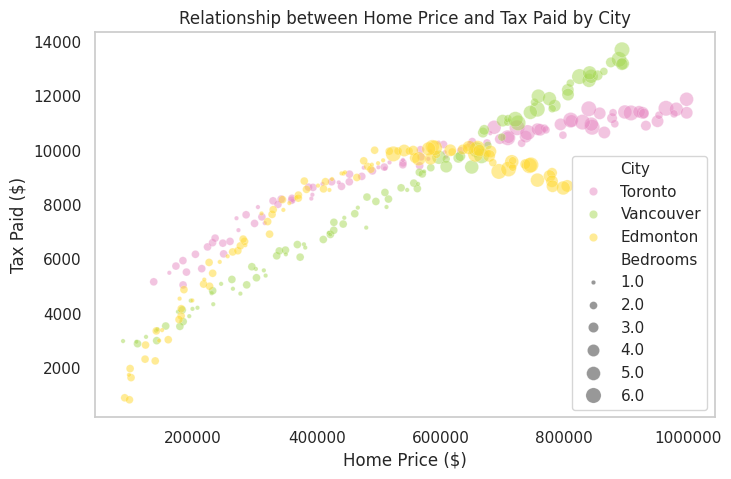

In [37]:
# Let's add some better colors first
newColor2 = sns.color_palette("Set2")

fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.scatterplot(data=home_Data, x='Home Price', y='Tax', hue='City',
                size="Bedrooms", sizes=(10, 120), alpha=.5, palette=newColor2[3:6] )
plt.xlabel('Home Price ($)')
plt.ylabel('Tax Paid ($)')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Relationship between Home Price and Tax Paid by City')
plt.show()

## Plotly for Bubble
As per usual, the last thing we'll do is adapt our code for plotly.

In [38]:
# Define hover text and bubble size
hover_text = []
bubble_size = []

# Here we generate some text for when we hover over the bubbles
# This can be updated to add additional information (if we had it)
for index, row in home_Data.iterrows():
    hover_text.append(('Bedrooms: {Bedrooms}<br>').format(Bedrooms=row['Bedrooms']))
    bubble_size.append(np.sqrt(row['Bedrooms']))

home_Data['text'] = hover_text

# We'll update the size of the bubbles here
sizeref = 2.*max(home_Data['Bedrooms'])/(500)

# Create dictionary with dataframes for each city
city_Names = ['Edmonton', 'Toronto', 'Vancouver']
city_data = {City:home_Data.query("City == '%s'" %City)
                              for City in city_Names}

# Create figure
fig = go.Figure()

# Loop around the dictionary to isolate and add each city and associated data
for city_name, City in city_data.items():
    fig.add_trace(go.Scatter(
        x=City['Home Price'], y=City['Tax'],
        name=city_name, marker_size=City['Bedrooms'], text=City['text']
        ))

# Tune markers
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))
# Update background so it's white
fig.update_layout(plot_bgcolor='white')

# Update Axes
fig.update_xaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='white' )
fig.update_yaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgrey')

# Update X and Y Axis Labels
fig.update_layout(xaxis_title="Home Price ($)", yaxis_title="Tax Paid ($)")

# Update Title
fig.update_layout(title_text="Relationship between Home Price and Tax Paid by City", title_x=0.5)
fig.show()